# Exploring the Titianic ML dataset from Kaggle: 

### The sinking of the RMS Titanic is the most well known shipwreck in history. It set out on its maiden voyage in April 1912 and sank when crossing the North Atlantic resulting in the death of around 1500 of the 2200+ passengers and crew on board. We want to look at the Titanic ML dataset from Kaggle to try and understand who was likelier to survive and then use ML methods to predict which passengers survived the tragedy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

### Importing and Observing the data:

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Some assumptions on factors which affected the likelihood of survival:

    - Gender
    - Pclass
    - Age
    - Sibsp and Parch may have, can combine these features into one to determine the total family size of each passenger
    - Fare and Embarked may have an effect on Pclass which in turn affects survived.

### Observing Categorical Variables:

In our data we have some categorical variables we can observe to determine if they are suitable to keep:

### Pclass: 

I want to pivot Pclass with Survived in a 2 way table to observe the likelihood of survival by pclass.

In [5]:
train_df[['Survived', 'Pclass']].groupby('Pclass', as_index = False).mean().round(2)

,Pclass,Survived
0,1,0.63
1,2,0.47
2,3,0.24


Here we observe that 63% of those in pclass 1 survived whil for pclass 3 it was only 24%. 

From this we can assume that Pclass 1 was mainly made up of those from a higher socioeconomic status. Looking at the fare prices, we see that Pclass 1 has the highest price of all ticket classes confirming our initial thought. 

We assume that those affording higher fares were from a higher SES.

In [6]:
train_df[['Pclass', 'Fare']].groupby(['Pclass'], as_index = False).mean().round(2)

,Pclass,Fare
0,1,84.15
1,2,20.66
2,3,13.68


This confirms the above assumption, Pclass 1 cost more so likelier had passengers from a higher SES.
Since Survived seems to had a link to Pclass we will use it in our analysis.

### Sex: 

The second categorical value we want to observe is Sex. We assumed that females would have a survival rate since we know that they were given priority on lifeboats.

In [7]:
train_df[['Survived','Sex']].groupby(['Sex'], as_index = False).mean().round(2)

,Sex,Survived
0,female,0.74
1,male,0.19


The likelihood of surviving if female was 0.74 and if male is 0.19. Sex definitely played a part in survived so we will use it in our model.

### Visualising Numeric variables:

### Age:

We would like to look at the age of passengers as a histogram to get an idea of the number of people per age in the data. We can create a grid of histograms which will compare the age of the passengers across Pclass and the likelihood of survived.

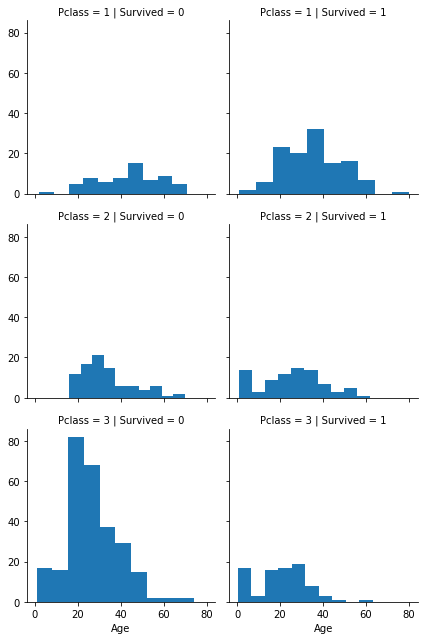

In [8]:
age_grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass')
age_grid.map(plt.hist, 'Age')

From our grid we see that the ages of those in Pclass 1 was higher on average but most people were between 20-40 years old through all classes. 

In Pclass 2 and 3, infants under age 4 were overrepresented in the number of survivors. We could delve deeper into age and observe how men and women over different age groups fared.

C:\Users\Ekim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ekim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ekim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'Male')

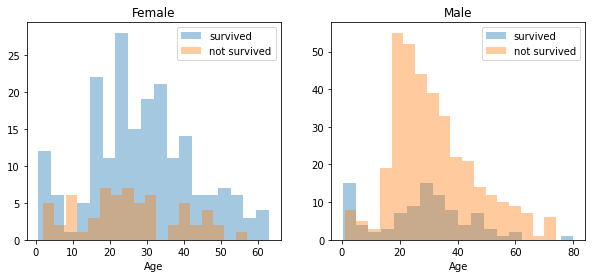

In [9]:
#Women 
survived = 'survived'
not_survived = 'not survived'
women = train_df[train_df['Sex'] == 'female']
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins = 18, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')
#Men
men = train_df[train_df['Sex'] == 'male']
ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(),bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins = 18, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

From this we see women across all age groups outsurvived men by a large amount as previously determined. The only age range where male survivors outnumbered deaths is for those under age 4.

We should now look at embarked,sipsp and parch to make observations.

### Embarked:

We want to see if embarked had an effect on survived:

In [10]:
train_df[['Survived','Embarked']].groupby(['Embarked'], as_index = False).mean().round(2)

,Embarked,Survived
0,C,0.55
1,Q,0.39
2,S,0.34


It appears that those who embarked from C were likelier to survive than those who embarked from Q or S. It is unlikely that simply boarding a ship in a specific location would determine survival. We should further look into Embarked by observing
how sex and pclass were linked with embarked since those two features were highly likely to effect survived: 

C:\Users\Ekim\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Ekim\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


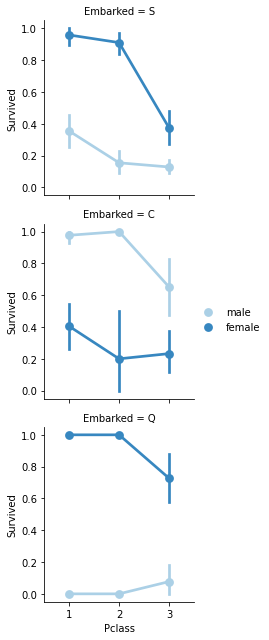

In [11]:
emb_grid = sns.FacetGrid(train_df, row = 'Embarked')
emb_grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'Blues')
emb_grid.add_legend()

In both S and Q women were likelier to survive than men, this was different in C. In S and C Pclass 1 was likeliest to survive, in Q it was Pclass 3 however the difference in 3 was very small. Embarked seems to be correlated with survived through Sex and Pclass.

### SibSp:

In [12]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'],as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


C:\Users\Ekim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


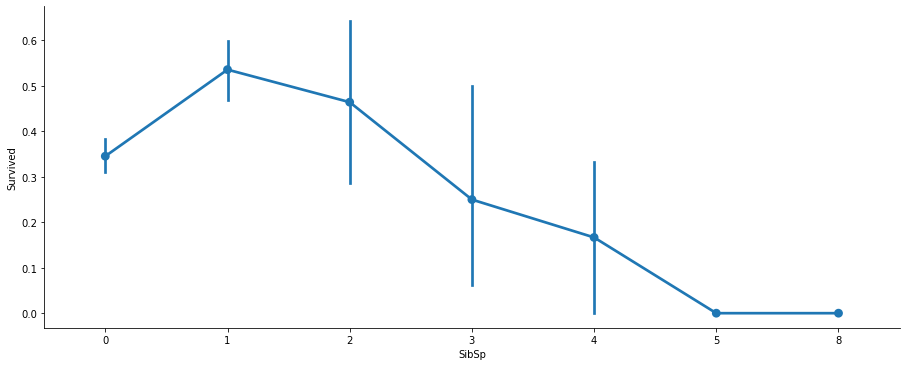

In [13]:
sibsps = sns.catplot('SibSp', 'Survived', data = train_df, aspect = 2.5, kind = 'point')

There doesn't seem to be much correlation here, survived is highest when sibsp is 1,2 and 3 and lower in the rest of cases.

### Parch:

In [14]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


C:\Users\Ekim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


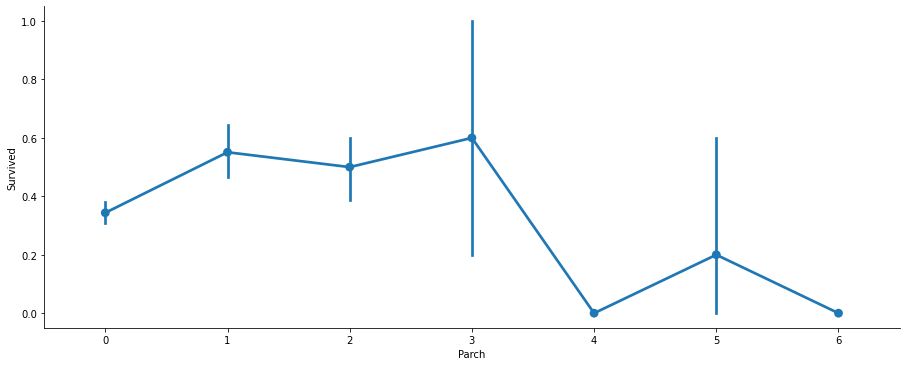

In [15]:
parchs = sns.catplot('Parch', 'Survived', data= train_df, aspect = 2.5, kind = 'point')

The result here is similar to sibsp where parch  1,2 and 3 seems to have a higher likelihood of survival. Instead of having two seperate variables here, we could combine them into a single variable which includes the total number of relatives a person has by combining SibSp and Parch.

We will do this when processing our data in the next step.

### Data Processing:

We had items missing values in embarked, cabin and age in our test data and cabin, fare and age in our training data.

We also have unnecesarry features which will likely not help us in building our predictive model such as passengerid and ticket.

#### 4 C's of data cleaning: Correct, Complete, Create, Convert.

### Correct:

 Do we need to correct any data? Observe outliers etc

In [16]:
train_df.mean()
train_df.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

The only value which seems odd is the Fare of 512 vs mean fare 32 however this is not completely extraordinary. We wont be correcting any of the data.

### Complete:

Like mentioned previously we have several features with missing information which we should complete. We have Age, Cabin and Embarked in the training set and Age, Cabin and Fare in the test set.

#### Cabin: 

In [17]:
sum(train_df['Cabin'].isna())

687

Out of 891 entries, Cabin has 687 values which are null. We could use cabin in our final model but let us first discuss how cabin may effect survived. 

Cabin can be a proxy for socioeconomic status, those with a higher status staying in certain cabins. 

It could also act as a proxy for the number of family members and have varying cabin sizes. In both of these cases these differences are already accounted for. One other area we could look at is the position of the cabin ad if those in specific cabins were closer to lifeboats or escape routes however getting onto a lifeboat is heavily affevted by sex, pclass etc. so it is unlikely proximity of a cabin to an excape route would override these factors.

For this reason, we will drop cabin form our dataset. Filling in the high number of NA values seems unnecessary considering the limited use it would have.

In [18]:
train_df.iloc[0]
train_df = train_df.drop(columns = ['Cabin'])
test_df = test_df.drop(columns = ['Cabin'])
test_df.iloc[0]

PassengerId                 892
Pclass                        3
Name           Kelly, Mr. James
Sex                        male
Age                        34.5
SibSp                         0
Parch                         0
Ticket                   330911
Fare                     7.8292
Embarked                      Q
Name: 0, dtype: object

#### Embarked:

In [19]:
combined = [train_df, test_df]

In [20]:
for dataset in combined:
    print(sum(dataset['Embarked'].isna()))

2
0


In train_df, embarked as 2 missing values, in test_df, no missing values.

We can fill the NA values with the modal embarked values since we are only replacing 2.

In [21]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace = True)
sum(train_df['Embarked'].isna())

0

#### Age:

In [22]:
sum(train_df['Age'].isna())
sum(test_df['Age'].isna())

86

177 NA values in train_df and 86 in test_df. We want to fill in Na values in age by creating a range of values between mean-std dev and mean + std dev. The total number of values created should be the total number of NA values.

In [23]:
combined = [train_df, test_df]

for dataset in combined:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    
train_df["Age"].isnull().sum()
test_df["Age"].isnull().sum()

0

In [24]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2 

#### Age:

We only have 1 fare in the test data which is null. we can just fill this in with the a 0 and convert it to an integer.


In [25]:
test_df['Fare'] = test_df['Fare'].fillna(0)
test_df['Fare'].isnull().sum()
test_df['Fare'] = test_df['Fare'].astype(int)
train_df['Fare'] = train_df['Fare'].astype(int)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    object
 4   Age          418 non-null    int32 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int32 
 9   Embarked     418 non-null    object
dtypes: int32(2), int64(4), object(4)
memory usage: 29.5+ KB


### Convert:


We want to create some new features from our existing features. First we will combing sibsp and parch into a single feature which counts the number of relatives a passenger has. Next we will create a dummy variable to indicate if passengers were alone or not.

We want to convert name to a feature for 'title' which will be extracted from name. Titles can tell us about the SES and age of the passenger which will help create a better predictor.

In [26]:
combined = [train_df, test_df]
for dataset in combined:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    
train_df['relatives'].sample(9)

844     0
172     2
539     2
267     1
578     1
137     1
199     0
727     0
863    10
Name: relatives, dtype: int64

We can also make a variable which looks at if a passenger was alone or not.

In [27]:
combined = [train_df, test_df]
for dataset in combined:
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 1
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 0

train_df['not_alone'] = train_df['not_alone'].astype(int)
train_df['not_alone'].value_counts()

test_df['not_alone'] = test_df['not_alone'].astype(int)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    object
 4   Age          418 non-null    int32 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int32 
 9   Embarked     418 non-null    object
 10  relatives    418 non-null    int64 
 11  not_alone    418 non-null    int32 
dtypes: int32(3), int64(5), object(4)
memory usage: 34.4+ KB


#### Analysing relatives and not_alone:

C:\Users\Ekim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


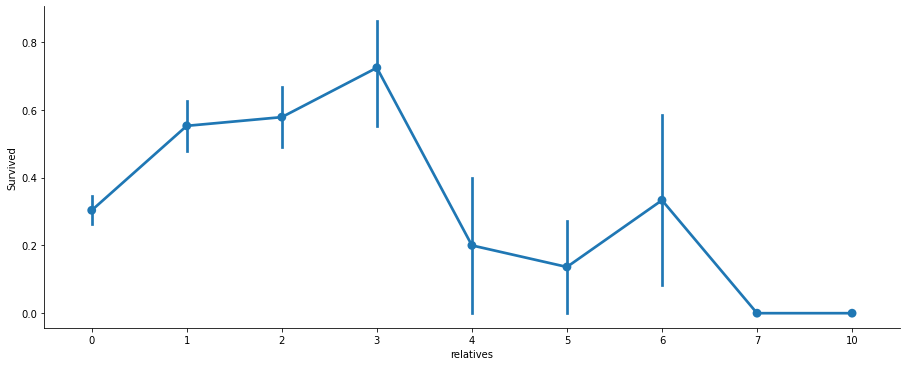

In [28]:
rlt = sns.catplot('relatives', 'Survived', data = train_df, aspect = 2.5, kind = 'point')

Those with 1,2,3 relatives were likelier to survive than others. 

In [29]:
train_df[['not_alone', 'Survived']].groupby('Survived').mean()

,not_alone
Survived,
0,0.318761
1,0.523392


It seems that those who werent alone were also likelier to survive. 


In [30]:
train_df[['not_alone', 'Sex']].groupby('Sex', as_index = False).mean()

,Sex,not_alone
0,female,0.598726
1,male,0.287695


It seems that females were less likely to be alone. It may be that being alone or not does not determine survival, but factors such as 
Sex and Age may affect being alone. Women may be less likely to be alone since they're with siblings and spouses, children will likely
also not be alone since they're with parents. These two factors affect survived.

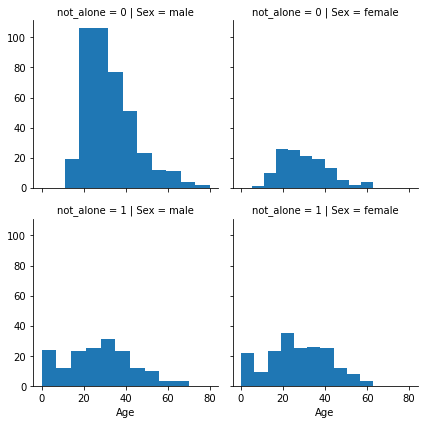

In [31]:
age_grid = sns.FacetGrid(train_df, col = 'Sex', row = 'not_alone')
age_grid.map(plt.hist, 'Age')

#### Name:

Since name does not provide much value in making a prediction on its own, we can drop it. However, some of the information within name can help us predict the likelihood of survival. 

We have the title of each passenger in the name column and from this we can gain better understanding of age, SES, Pclass, location of embarking etc.

To do this, we will look into the name column using a RegEx to extract the title. We will create a dictionary of the most common titles and
group the less common titles under a rare title type. We replace the previous titles with the title names in our new dictionary and 
finally drop the name column.

In [32]:
combined = [train_df, test_df]
titles = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}

for dataset in combined: 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

Observing the unique titles:

In [33]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [34]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [35]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We see different likelihoods of survival depending on the title of the individual. From the above we take Mr, Mrs, Miss, Master and store the rest as rare since they rarely occur. 

We will replace some of our titles with new ones:

In [36]:
for dataset in combined: 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)

In [37]:
pd.crosstab(train_df['Title'],train_df['Sex']) 

Sex,female,male
Title,,
1,0,517
2,185,0
3,126,0
4,0,40
5,3,20


In [38]:
pd.crosstab(test_df['Title'],test_df['Sex']) 

Sex,female,male
Title,,
1,0,240
2,79,0
3,72,0
4,0,21
5,1,5


All persons within either dataset fall into the titles we specified above. Let us double check for any null values:

In [39]:
dataset['Title'].isnull().sum()

0

We will now get rid of the name column:


In [40]:
train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

We want to convert our categorical variables into numeric/ordinal to improve ease of use in our model.


#### Sex:

In [41]:
gender = {'male':0, 'female':1}
combined = [train_df,test_df]
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map(gender)

#### Ticket:


In [42]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

We have 681 unique tickets and will therefore struggle to make any use of it so we can drop it.

In [43]:
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

We now convert embarked into a numeric feature:

In [44]:
embarks = {'S':0, 'C':1, 'Q':2}

combined = [train_df, test_df]
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].map(embarks)

train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int32
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
 7   Fare         891 non-null    int32
 8   Embarked     891 non-null    int64
 9   relatives    891 non-null    int64
 10  not_alone    891 non-null    int32
 11  Title        891 non-null    int64
dtypes: int32(3), int64(9)
memory usage: 73.2 KB


Now that we have removed all na values and converted all our data into type(int), we can look at altering Age.

Instead of having a series of numbers form 0 to 80 for all ages, we can create buckets which will collect specific age ranges.

In [45]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

Let's see how it's distributed:

In [46]:
train_df['Age'].value_counts()


4    166
5    159
6    155
3    135
2    112
1     89
0     68
7      7
Name: Age, dtype: int64

We now can do the same thing with Fare:

In [47]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

Now that we have completed data processing, we can move onto building our model.

## Building Our Model:

To begin, I will use my data in training several machine learning models I am most familiar with: Random Forest, Decision Tree, K Nearest Neighbours, Logistic Regression and a Linear Support Vector Machine.

In [48]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

In [49]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy()  

X_test = X_test.drop('PassengerId', axis = 1)
X_train = X_train.drop('PassengerId', axis = 1)

X_train is the model built using the training data, Y_train is Survived from the training data which is the dependent variable.

X_test is a copy of the test data, after we fit our model using X_train and Y_train, we will use it to predict Y_test which will be the probability of survival built using the test data X_test.

We will run multiple algorithms with our data, then we will compare the accuracy of each model and focus on those which performed better.

#### Random Forest:

In [50]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

#### Decision Tree:

In [51]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

#### KNN:

In [52]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  

Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

#### Logistic Regression:


In [53]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

#### Linear SVC:

In [54]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\Ekim\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Now we want to create a table to observe the accuracy of each of the models we used:


In [55]:
result = pd.DataFrame({
        'Model': ['Support Vector Machine', 'Logistic Regression', 'K Nearest Neighbours', 'Decision Tree', 'Random Forest'],
        'Score': [acc_linear_svc, acc_log, acc_knn, acc_decision_tree, acc_random_forest]})


result_df = result.sort_values(by='Score',ascending = False)
result_df = result_df.set_index('Score')
result_df.head(5)

,Model
Score,
91.13,Decision Tree
91.13,Random Forest
85.19,K Nearest Neighbours
82.04,Logistic Regression
81.14,Support Vector Machine


Since the Random Forest is joint top with Decision Tree and is my favorite model  to discuss, we will use it as our main model in the rest of our analysis.

#### Random Forest: 

RF builds a collection of individual decision trees and then merges them to better evaluate a prediction.

RF models contain all the hyperparameters of a decision tree model and add the hyperparameters of a bagging classifier.

Basically, the bagging classifier allows us to make multiple predictions on random subsets of the original data and then 
aggregates them.

This adds some randomness to our model and allows for a more realistic evaluation of our data. It reduces the variance of our data but also increases bias. The reduced variance makes up for the increase in bias shown in our prediction.

Visualise a random forest as a random selection of n decision trees, then aggregate the outcome of each individual tree.


#### K-Fold cross validation:

We can further test the Accuracy of Random Forest using K-Fold cross validation where we split our training data into multiple datasets and use them to evaluate another.

For example if we split training data into 1,2,3,4 we would use 1,2,3 to predict 4 and continue doing this until we had used every possible combination of sets to predict each of the 4 different tests.

From this we would get 4 different values representing the evaluation of the 4 different splits and then run some exploratory statistics too see how much our value changed from the initial score of 91.02.

We want to do this with a higher number of Folds, in our case we will use 10 so the dataset will be split and trained 10 times.

In [56]:
from sklearn.model_selection import cross_val_score


rf = RandomForestClassifier(n_estimators=100)


scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74444444 0.83146067 0.75280899 0.85393258 0.84269663 0.86516854
 0.83146067 0.78651685 0.82022472 0.80898876]
Mean: 0.8137702871410737
Standard Deviation: 0.03879052452810926


Now we observe that our model has an accuracy of 81% compared to the 91% seen previously, our scores have a standard deviation of 4 so our model predicts the outcome the an accuracy of 81% +/- 4%.

Now we want to observe the importance of each of the individual features in our model:


In [57]:
importance = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})

#Creates a data frame using the columns from x_train and takes featuer importance from the model we stored in 'random_forest' variable.

importance = importance.sort_values('importance',ascending=False).set_index('feature')

#we sort the values by the importance column in a descending order and set the feature column as the index.

importance.head(15)

,importance
feature,
Title,0.233
Sex,0.179
Age,0.160
Pclass,0.112
Fare,0.112
relatives,0.068
Embarked,0.050
SibSp,0.046
Parch,0.026


<AxesSubplot:xlabel='feature'>

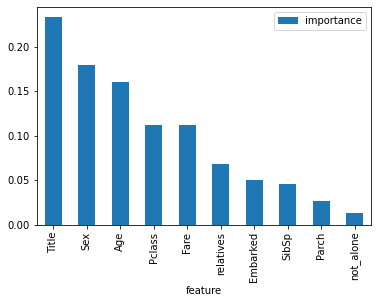

In [58]:
importance.plot.bar()


This shows us that Parch and not_alone are far less significant than other features in our data. 

We can rebuild the model after removing those features in order to get a better prediction.

Using too many features also causes models to suffer from overfitting. This means our model represents the data to much which will mean it will replicate our data very well but will suffer when predicting new outcomes.

Let's drop the less significant features:

In [59]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

X_train = train_df.drop("Survived", axis=1)
X_train = X_train.drop("PassengerId", axis = 1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis = 1)


random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)

random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9113355780022446

In [60]:
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")


91.13 %


We will create a data frame using the columns from x_train and takes feature importance from the model we stored in 'random_forest' variable.

In [61]:
importance = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importance = importance.sort_values('importance',ascending=False).set_index('feature')

In [62]:
print(importance)


           importance
feature              
Title           0.225
Sex             0.171
Age             0.167
Pclass          0.123
Fare            0.119
relatives       0.087
SibSp           0.059
Embarked        0.049


### Conclusion: 

We see that as we assumed at the start of our project, Sex, Age and Socioeconomic status were big determinants of Survival.

We considered Pclass as a proxy for SES but after observing Title as the best predictor we can assume it is a better proxy.

If we wanted to we could drop further features such as relatives, SibSp and Embarked and see how our model changes.